### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [32]:
sunspots = sm.datasets.sunspots.load_pandas()
sunspots = sunspots.data
air = pd.read_csv('data/AirPassengers.csv')
#air.drop('Month', axis=1)
#air['Index'] = air.index

Text(0, 0.5, 'Number of passengers')

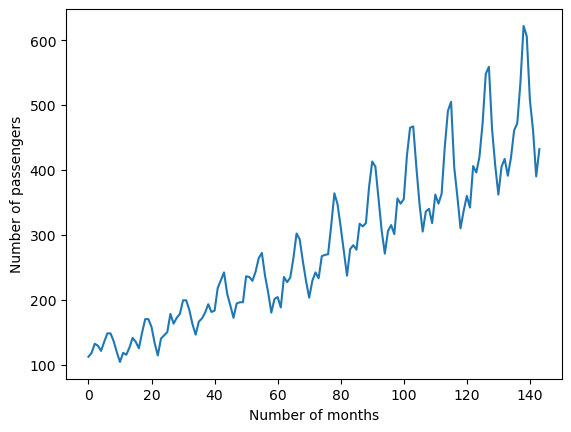

In [71]:
plt.plot(air.index, air['#Passengers'])
plt.xlabel('Number of months')
plt.ylabel('Number of passengers')

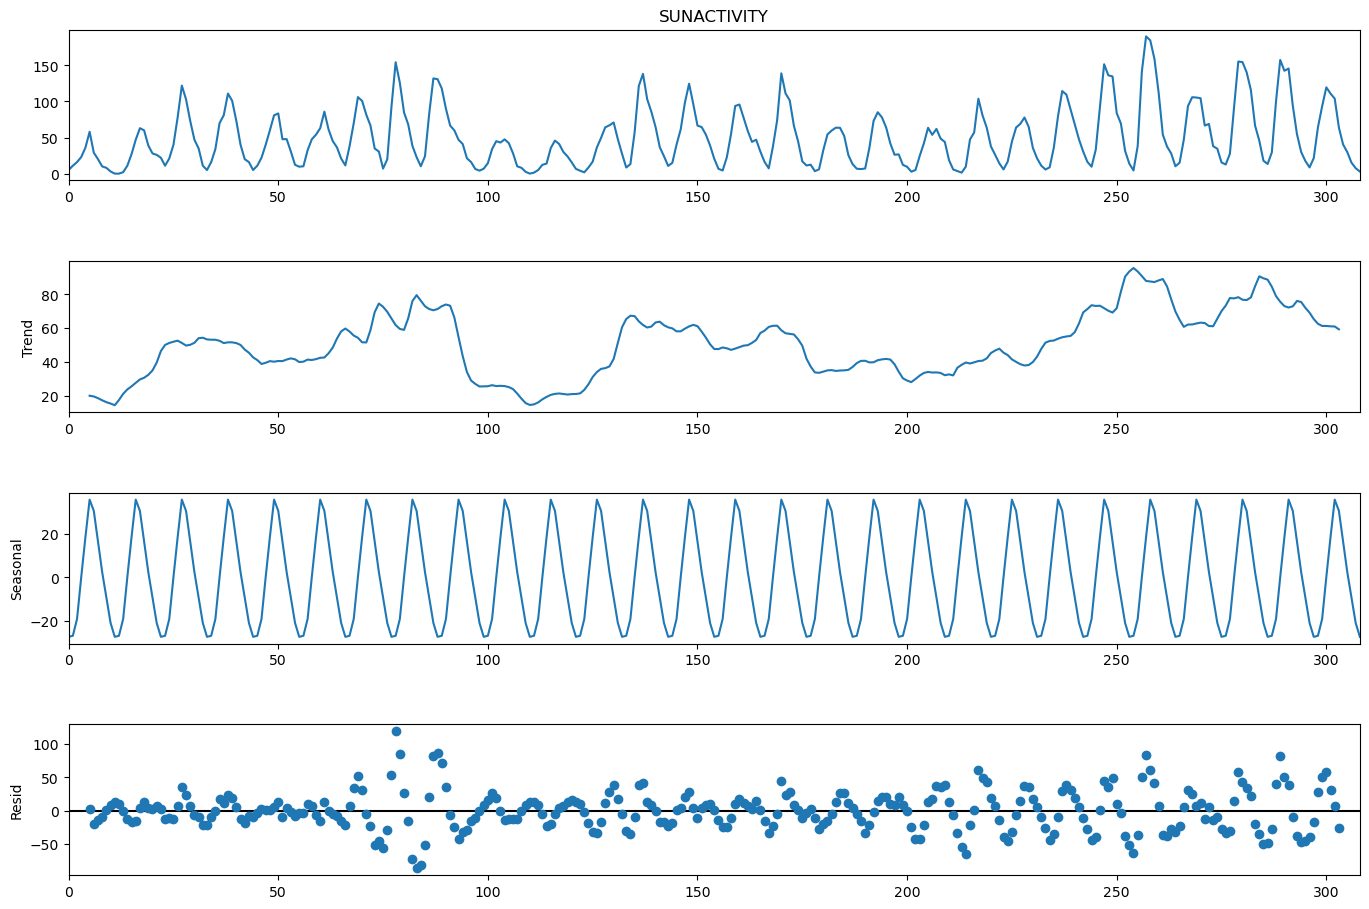

In [51]:
ss = seasonal_decompose(
    x = sunspots['SUNACTIVITY'],
    model='additive',
    period = 11
)
fig = ss.plot()
fig.set_figwidth(15)
fig.set_figheight(10)

In [66]:
ss.resid.dropna()

5       2.581858
6     -20.795415
7     -14.912972
8      -9.509605
9       1.080631
         ...    
299    51.121035
300    58.248644
301    31.611607
302     7.554585
303   -25.886324
Name: resid, Length: 299, dtype: float64

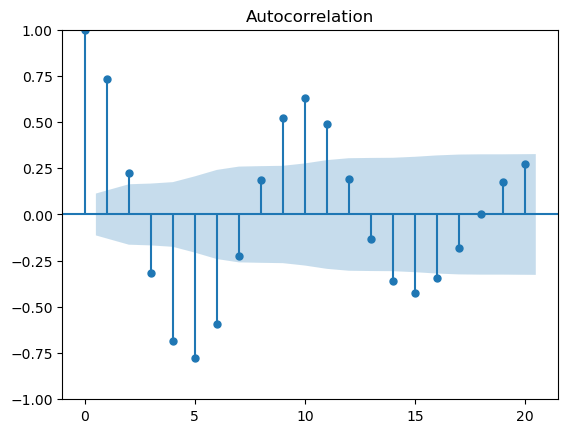

In [72]:
_ = plot_acf( 
    x = ss.resid.dropna(), lags=20
)

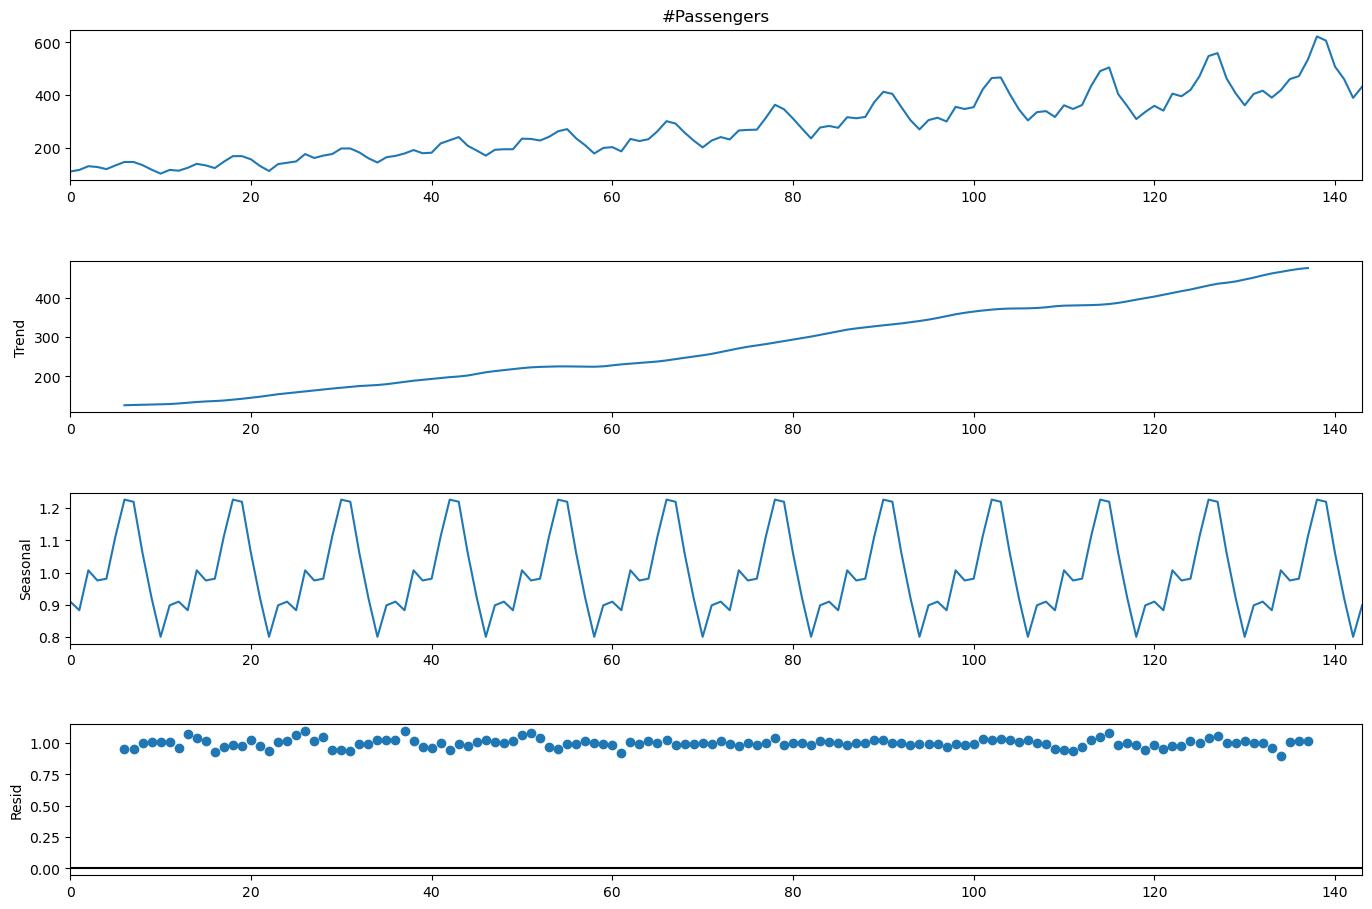

In [47]:
ap = seasonal_decompose(
    x = air['#Passengers'],
    model='multiplicative',
    period = 12
)
fig = ap.plot()
fig.set_figwidth(15)
fig.set_figheight(10)